# Notebook: Quick Sort with 2 pivots
## Author: Lincoln Steber
## Course: CS 2500 (Algorithms) @ Missouri S&T

### Prerequisite Packages

We will be using numpy, matplotlib library in this jupyter notebook.

In [13]:
# Install all the prerequisite packages from the Terminal
%pip install numpy
%pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import time
import numpy as np
import matplotlib.pyplot as plt

## Quick Sort with print statements

In [15]:
def partition_print(A, p, r):
    if A[p] > A[r]:
        A[p], A[r] = A[r], A[p]
        print(f"Swaped: A[%2d]: %2d  and  A[%2d]: %2d  |  Array: {A}" % (p, A[p], r, A[r]))
    q1 = A[p]
    q2 = A[r]
    i = p + 1
    j = r - 1
    k = i
    while k <= j:
        if A[k] < q1:
            A[i], A[k] = A[k], A[i]
            if A[i] != A[k]:
                print(f"Swaped: A[%2d]: %2d  and  A[%2d]: %2d  |  Array: {A}" % (i, A[i], k, A[k]))
            i += 1
        elif A[k] > q2:
            while A[j] > q2 and k < j:
                j -= 1
            A[j], A[k] = A[k], A[j]
            if A[j] != A[k]:
                print(f"Swaped: A[%2d]: %2d  and  A[%2d]: %2d  |  Array: {A}" % (j, A[j], k, A[k]))
            j -= 1
            if A[k] < q1:
                A[i], A[k] = A[k], A[i]
                if A[i] != A[k]:
                    print(f"Swaped: A[%2d]: %2d  and  A[%2d]: %2d  |  Array: {A}" % (i, A[i], k, A[k]))
                i += 1
        k += 1
    i -= 1
    j += 1
    A[p], A[i] = A[i], A[p]
    if A[p] != A[i]:
        print(f"Swaped: A[%2d]: %2d  and  A[%2d]: %2d  |  Array: {A}" % (p, A[p], i, A[i]))
    A[r], A[j] = A[j], A[r]
    if A[r] != A[j]:
        print(f"Swaped: A[%2d]: %2d  and  A[%2d]: %2d  |  Array: {A}" % (r, A[r], j, A[j]))
    return i, j

In [16]:
def quick_sort_print(A, p, r):
    if p < r:
            q1, q2 = partition_print(A, p, r)
            quick_sort_print(A, p, q1)
            quick_sort_print(A, q2, r)
            quick_sort_print(A, q1+1, q2-1)
    return A

## Check that the array is sorted correctly

In [17]:
def is_sorted(array):
    len_array = len(array)
    status = True
    i = 0
    while (i<len_array-1):
        if (array[i]>array[i+1]):
            status = False
        i = i + 1
    if (not status):
        print("Array is not sorted \n")
    else:
        print("Array is sorted \n")

## Test input for quick_sort_print and is_sorted functions

In [18]:
array = [12, 9, 11, 18, 15]

print(f"Input : {array}")
is_sorted(array)

array_out = quick_sort_print(array, 0, len(array) - 1)

print(f"\nOutput : {array}")
is_sorted(array_out)

Input : [12, 9, 11, 18, 15]
Array is not sorted 

Swaped: A[ 0]: 11  and  A[ 2]: 12  |  Array: [11, 9, 12, 18, 15]
Swaped: A[ 4]: 18  and  A[ 3]: 15  |  Array: [11, 9, 12, 15, 18]
Swaped: A[ 0]:  9  and  A[ 1]: 11  |  Array: [9, 11, 12, 15, 18]

Output : [9, 11, 12, 15, 18]
Array is sorted 



## Plotting Run-Time Complexity

In [19]:
def partition(A, p, r):
    if A[p] > A[r]:
        A[p], A[r] = A[r], A[p]
        
    q1 = A[p]
    q2 = A[r]
    
    i = p + 1
    j = r - 1
    k = i
    
    while k <= j:
        if A[k] < q1:
            A[i], A[k] = A[k], A[i]
            i += 1
        elif A[k] > q2:
            while A[j] > q2 and k < j:
                j -= 1
            A[j], A[k] = A[k], A[j]
            j -= 1
            if A[k] < q1:
                A[i], A[k] = A[k], A[i]
                i += 1
        k += 1
    
    i -= 1
    j += 1
    A[p], A[i] = A[i], A[p]
    A[r], A[j] = A[j], A[r]
    
    return i, j

In [20]:
def quick_sort(A, p, r):
    if p < r:
            q1, q2 = partition(A, p, r)
            quick_sort(A, p, q1)
            quick_sort(A, q2, r)
            quick_sort(A, q1 + 1, q2 - 1)
    return A

In [21]:
# Generate a random array of given size.
def generate_random_input(size):
    arr = np.random.randint(0, 20000, size = size)
    return arr

In [22]:
# Number of random arrays generated in this experiment
monte_carlo_runs = 500

# Range of array sizes considered
start_array = 10
end_array = 200
increments = 10

# Initiate average and worst case run-time
avg_time_taken = [0]*(end_array//increments)
worst_time_taken = [0]*(end_array//increments)

# Run-time experiments for random arrays of a given size
count = 0
for curr_array_size in range(start_array, end_array+1, increments):  
    run_times = []
    # Given a fixed array size, generate one random array and compute its run-time
    for iteration in range(monte_carlo_runs):             
        array = generate_random_input(curr_array_size)    # Generate random array
        start = time.time()                               # Record state time
        quick_sort(array, 0, len(array) - 1)
        end = time.time()                                 # Record end time
        run_times.append(end - start)                     # Instantaneous ruun-time for a specific random input         

    avg_time_taken[count] = sum(run_times)/len(run_times) # Empirical average of run-time
    worst_time_taken[count] = max(run_times)              # Worst case run time across various random experiments
    count += 1
#print(time_taken)

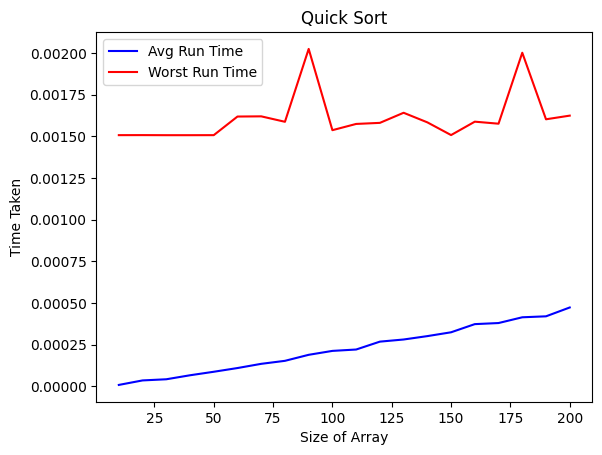

In [23]:
# Data Coordinates
x = np.arange(start_array, end_array+1, increments)
y = np.array(avg_time_taken)
z = np.array(worst_time_taken)

# Plot
plt.plot(x,y,'b',label='Avg Run Time') 
plt.plot(x,z,'r',label='Worst Run Time') 

# Add Title
plt.title("Quick Sort")

# Add Axes Labels
plt.xlabel("Size of Array") 
plt.ylabel("Time Taken") 

# Display
plt.legend()
plt.show()

### References
1. [Big o cheat sheet](https://www.bigocheatsheet.com/)
2. [Timeit example](https://www.geeksforgeeks.org/timeit-python-examples/)